# Camera connectivity and contol

There are multiple way that you can connect to a camera using the QSCOPE framework. In this notebook we show the various ways that you can connect a piece of equipment and control it.  

### Reset the camera 
if you are having issues connecting to it in the GUI try this. 

In [ ]:
import pylablib as pll

# Load the dlls for the Andor camera
lib_folder = "C:\\Qscope\\proprietary_artefacts\\andor_sdk3"
pll.par["devices/dlls/andor_sdk3"] = lib_folder
import pylablib.devices.Andor

camera_num = pylablib.devices.Andor.get_cameras_number_SDK3()
print(f"Number of cameras: {camera_num}")

# Create the camera object
cam = pylablib.devices.Andor.AndorSDK3Camera()
# Open the camera
cam.open()
# Set the trigger mode to internal
cam.set_trigger_mode("int")
# Set the exposure time to 1 second
cam.set_exposure(.1)
# Capture an image
image = cam.snap()
# Close the camera
cam.close()

### Opening the camera directly
You can open the camera using the inbuilt dlls (or the additional dlls for some cameras). 

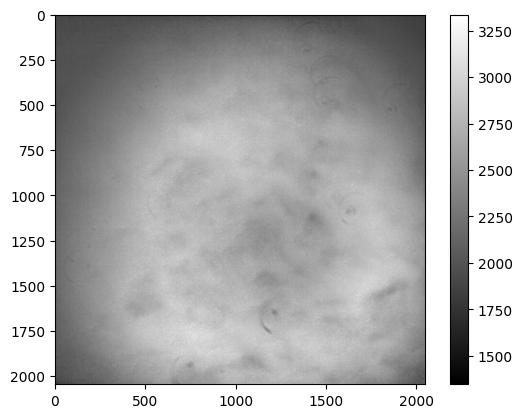

In [10]:
# Import startard libraries
import os

import matplotlib.pyplot as plt
import numpy as np

# Import addtional control libraries
import pylablib as pll
import pylablib.devices.Andor

# Import Logging libraries
from loguru import logger

# from qscope.device import Camera
# from qscope.util.logging import format_error_response
# this_folder = os.path.abspath(os.path.realpath(os.path.dirname(__file__)))
# lib_folder = os.path.abspath(
#     os.path.join(this_folder, *[".." for i in range(5)], "proprietary_artefacts")
# )

lib_folder = "C:\\Qscope\\proprietary_artefacts\\andor_sdk3" # Load the dlls for the Andor camera
# pll.par["devices/dlls/andor_sdk3"] = lib_folder

# Create the camera object
cam = pylablib.devices.Andor.AndorSDK3Camera()
# Open the camera
cam.open()
# Set the trigger mode to internal
cam.set_trigger_mode("int")
# Set the exposure time to 1 second
cam.set_exposure(1)
# Capture an image
image = cam.snap()
# Close the camera

# Display the image
plt.imshow(image, cmap="gray")
plt.colorbar()
plt.show()

In [2]:
cam.set_temperature(-25, enable_cooler=True)

-25.0

In [9]:
cam.get_all_attribute_values()

Dictionary('AOIBinning': 1x1
'AOIHBin': 1
'AOIHeight': 2046
'AOILayout': Image
'AOILeft': 1
'AOIStride': 4096
'AOITop': 1
'AOIVBin': 1
'AOIWidth': 2048
'AccumulateCount': 1
'AuxOutSourceTwo': ExternalShutterControl
'AuxiliaryOutSource': FireRow1
'Baseline': 100
'BitDepth': 16 Bit
'BytesPerPixel': 2.0
'CameraAcquiring': False
'CameraFamily': Andor sCMOS
'CameraModel': SONA-4BV6U
'CameraName': Sona
'CameraPresent': True
'CycleMode': Fixed
'ElectronicShutteringMode': Rolling
'EventEnable': True
'EventSelector': BufferOverflowEvent
'ExposureTime': 0.1000032
'ExternalTriggerDelay': 0.0
'FanSpeed': Low
'FirmwareVersion': 23.10.19.12597
'FrameCount': 1
'FrameRate': 8.808508314350998
'FullAOIControl': True
'I2CByte': 210
'I2CByteCount': 1
'I2CByteSelector': 0
'IOInvert': False
'IOSelector': Fire 1
'ImageSizeBytes': 8380416
'MetadataEnable': False
'MetadataFrame': True
'MetadataFrameInfo': True
'MetadataTimestamp': True
'MicrocodeVersion': 2008
'MultitrackBinned': True
'MultitrackCount': 1
'Mul

In [11]:
cam.close()

# Instantiating a system
You can also create a system object and then control the camera throught the system itself, which is ultimately the way the gui works al beit through a messaging server. 

In [1]:
import matplotlib.pyplot as plt

import qscope.device.seqgen.pulseblaster.spinapi as pb
import qscope.system
from qscope.device.seqgen.pulseblaster import PulseBlaster
from qscope.system import SGCameraSystem
# from qscope.system.config import HQDM, MockSetup

# open the system
system_config = qscope.system.get_system_config("gmx")
systyp = system_config.system_type
system = systyp(system_config)

system.startup()

2025-05-14 16:28:52.329 | WARNING  | qscope.device.picoscope.picoscope:<module>:59 - PicoSDK not available - Picoscope functionality will be limited
2025-05-14 16:28:52.344 | INFO     | qscope.system.system:__init__:254 - Using system configuration of type SystemConfig
2025-05-14 16:28:52.345 | INFO     | qscope.system.system:_init_dev_config:355 - Initialising devices.
2025-05-14 16:28:52.345 | INFO     | qscope.system.system:_init_dev_config:380 - Initialized PulseBlaster with role SEQUENCE_GEN
2025-05-14 16:28:52.345 | INFO     | qscope.system.system:_init_dev_config:380 - Initialized SynthNV with role PRIMARY_RF
2025-05-14 16:28:52.345 | INFO     | qscope.device.andor.andor:__init__:34 - C:\qscope\proprietary_artefacts\andor_sdk3
2025-05-14 16:28:52.345 | INFO     | qscope.system.system:_init_dev_config:380 - Initialized Sona with role MAIN_CAMERA
2025-05-14 16:28:52.348 | INFO     | qscope.device.seqgen.pulseblaster.spinapi:_checkloaded:77 - Using SpinAPI version b'20171214'
2025-

{'PulseBlaster_1': {'status': True, 'message': 'Pulseblaster opened'},
 'SynthNV_1': {'status': True,
  'message': 'Connected to RF source: windfreak on port COM5'},
 'Sona_1': {'status': True,
  'message': "Connected to Camera: TDeviceInfo(camera_name='Sona', camera_model='SONA-4BV6U', serial_number='CSC-00983', firmware_version='23.10.19.12597', software_version='3.15.30092.0')"}}

In [ ]:
# set the camera parameters
from qscope.types import MAIN_CAMERA, PREFIX_TO_ROLE, PRIMARY_RF, SEQUENCE_GEN
role = MAIN_CAMERA
frame_shape = (1024, 1024)
system.get_device_by_role(role).set_roi(frame_shape)
system.get_device_by_role(role).set_exposure_time(0.01)

# ce.andor.Zyla55.set_exposure_time(0.1)
# system.camera.set_hardware_binning((1, 1))
# system.camera.set_roi((0, 0, 1024, 1024))
# capture an image
image = system.get_device_by_role(role).take_snapshot()
# display the image
plt.figure()
plt.imshow(image, cmap="gray")
plt.colorbar()
plt.show()

In [ ]:
system.get_device_by_role(role).start_popup_video()

In [ ]:
# Turn the laser on
# TODO: This is not working
system.set_laser_output(1)

image = system.get_device_by_role(role).take_snapshot()
# display the image
plt.figure()
plt.imshow(image, cmap="gray")
plt.colorbar()
plt.show()

# Turn the laser off
system.set_laser_output(0)

In [ ]:
# close the system
system.packdown()

# Connection to the camera through the server


In [ ]:
import qscope.server

# Start the client server
qscope.server.start_client_log(log_to_stdout=True, log_level="INFO")

# Start the connection manager
manager = qscope.server.ConnectionManager()
# Start connection manager and define the system
try:
    manager.start_local_server(
        # "zyla",
        # "hqdm",
        "gmx",
    ) # logs go to ~./qscope/server.log
    # Connect to the server
    manager.connect()
    manager.startup()
except qscope.server.ServerAlreadyRunning:
    manager.connect()
    pass

In [ ]:
manager.camera_start_video()

In [ ]:
manager.camera_stop_video()

In [ ]:
manager.save_latest_stream("data")

In [ ]:
manager.stop_server()